In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("Product_details.csv")
df

# STEP 1.) `VISUALIZING DATASET`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Product_Type.value_counts()

9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: Product_Type, dtype: int64

In [ ]:
print(df.Sentiment.value_counts(normalize = True)*100,"%")

2    59.160905
3    32.825267
1     6.269642
0     1.744186
Name: Sentiment, dtype: float64 %


In [ ]:
# percentage of each review.

print("Very_bad:-", (111/6364)*100,"%")
print("Bad:-", (399/6364)*100, "%")

print("Good:-", (3765/6364)*100, "%")
print("Very_Good:-", (2089/6364)*100, "%")




Very_bad:- 1.744186046511628 %
Bad:- 6.269641734758014 %
Good:- 59.16090509113765 %
Very_Good:- 32.82526712759271 %


In [ ]:
Sentiment_new=df["Sentiment"].replace([0,1,2,3],['Very_Bad','Bad',"good","Very_Good"])

In [ ]:
df["Sent_new"] = pd.DataFrame(Sentiment_new)

In [ ]:
df

<AxesSubplot:xlabel='Sent_new', ylabel='count'>

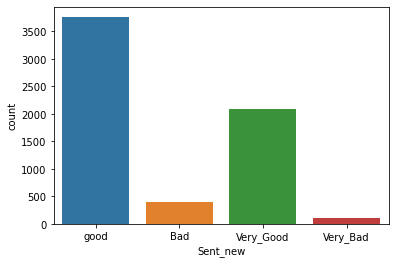

In [ ]:
import seaborn as sns

sns.countplot(df["Sent_new"], label = "Count")

In [ ]:
# Group the DataFrame by the values in columns A and B
grouped = df.groupby(['Product_Type', 'Sent_new'])

# Print the groups and the number of rows in each group
for name, group in grouped:
    print(name, len(group))


(0, 'Bad') 4
(0, 'Very_Good') 47
(0, 'good') 1
(1, 'Bad') 5
(1, 'Very_Good') 53
(1, 'good') 1
(2, 'Bad') 69
(2, 'Very_Bad') 2
(2, 'Very_Good') 379
(2, 'good') 15
(3, 'Bad') 49
(3, 'Very_Bad') 1
(3, 'Very_Good') 240
(3, 'good') 10
(4, 'Very_Good') 19
(5, 'Bad') 36
(5, 'Very_Good') 171
(5, 'good') 6
(6, 'Bad') 84
(6, 'Very_Bad') 2
(6, 'Very_Good') 563
(6, 'good') 16
(7, 'Bad') 43
(7, 'Very_Good') 276
(7, 'good') 8
(8, 'Bad') 65
(8, 'Very_Bad') 1
(8, 'Very_Good') 122
(8, 'good') 6
(9, 'Bad') 44
(9, 'Very_Bad') 105
(9, 'Very_Good') 219
(9, 'good') 3702


In [ ]:
# Compute the sum of each group
sum = grouped.sum()
pd.DataFrame(sum)


Text_ID  Sentiment
Product_Type Sent_new                      
0            Bad           19408          4
             Very_Good    213178        141
             good           4825          2
1            Bad           18504          5
             Very_Good    209698        159
             good           1628          2
2            Bad          295003         69
             Very_Bad      16799          0
             Very_Good   1627731       1137
             good          66732         30
3            Bad          220723         49
             Very_Bad       7495          0
             Very_Good   1073049        720
             good          43835         20
4            Very_Good     91175         57
5            Bad          162942         36
             Very_Good    810740        513
             good          42429         12
6            Bad          377132         84
             Very_Bad       8281          0
             Very_Good   2526801       1689
             good          76742         32
7            Bad          177044         43
             Very_Good   1265108        828
             good          38371         16
8            Bad          248343         65
             Very_Bad       4002          0
             Very_Good    528141        366
             good          23375         12
9            Bad          199725         44
             Very_Bad     460518          0
             Very_Good   1026150        657
             good       17190616       7404

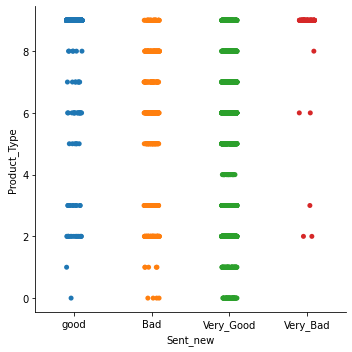

In [ ]:
import seaborn as sns
sns.catplot(x = "Sent_new", y = "Product_Type", kind= "strip", data = df,jitter = 1)

## a.)  Counting the text

In [ ]:
df.iloc[0][1]

'The Web Designer\x89Ûªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw'

In [ ]:
len(df.iloc[0][1])

89

In [ ]:
# Here length count each letter n space.
df["length"] = df["Product_Description"].apply(len)
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,length
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,89
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,119
2,8212,Crazy that Apple is opening a temporary store ...,9,2,111
3,4422,The lesson from Google One Pass: In this digit...,9,2,137
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,87


<AxesSubplot:ylabel='Frequency'>

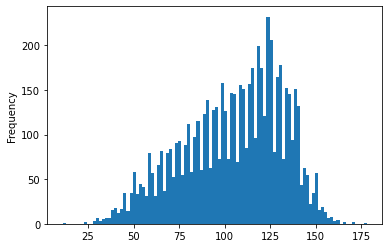

In [ ]:
df["length"].plot(bins = 100, kind = "hist")

In [ ]:
df["length"].describe()

count    6364.000000
mean      104.643463
std        27.285200
min        11.000000
25%        85.000000
50%       109.000000
75%       126.000000
max       178.000000
Name: length, dtype: float64

In [ ]:
df[df["length"] == 11]["Product_Description"]

3107    RT @mention
Name: Product_Description, dtype: object

In [ ]:
# lets see the lowest and longest review.

# Lowest
print("Lowest :-",df[df["length"] == 11]["Product_Description"].iloc[0]) 

# Longest
print("Longest :-",df[df["length"] == 178]["Product_Description"].iloc[0]) 

Lowest :- RT @mention
Longest :-  Ä_ÛâÜâ_âãªã_â»Ä_â_Ä â£Ä_ÇÁÎÙã¬¾Ûâ»ãÔ©ÛâRT @mention Get a look at #SXSW's rumored #Apple &quot;pop-up&quot; store in Austin: {link}


In [ ]:
# Lets Devide our Data as per review.
Very_bad = df[df["Sentiment"]==0]
Bad = df[df["Sentiment"]==1]
Good = df[df["Sentiment"]==2]
Very_good = df[df["Sentiment"]==3]

Text(0.5, 1.0, 'Very Good review')

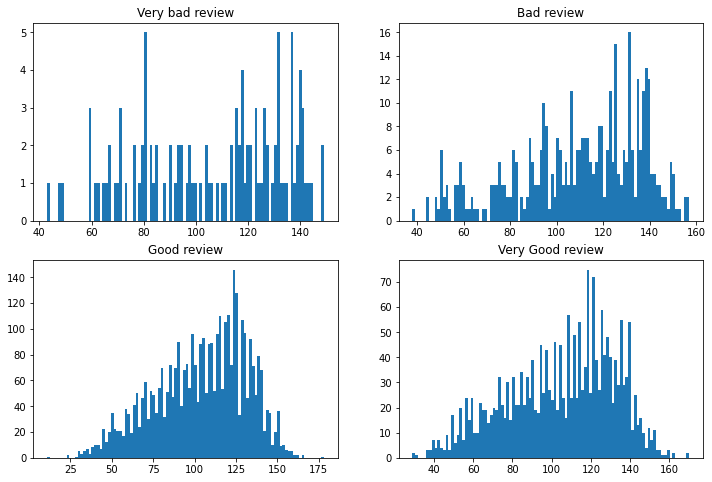

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
plt.hist(Very_bad["length"],bins = 100)
plt.title("Very bad review")

plt.subplot(2,2,2)
plt.hist(Bad["length"],bins = 100)
plt.title("Bad review")

plt.subplot(2,2,3)
plt.hist(Good["length"],bins = 100)
plt.title("Good review")

plt.subplot(2,2,4)
plt.hist(Very_good["length"],bins = 100)
plt.title("Very Good review")



In [ ]:
# Lets see descrition of defferent dataframe

desc = [Very_bad, Bad, Good, Very_good]

for reviews in desc:
    
    # Applying the describe() function to each dataframe.
    print(reviews["length"].describe())


count    111.000000
mean     106.414414
std       27.532615
min       43.000000
25%       82.000000
50%      113.000000
75%      130.500000
max      149.000000
Name: length, dtype: float64
count    399.000000
mean     109.902256
std       27.043107
min       38.000000
25%       93.000000
50%      114.000000
75%      132.000000
max      157.000000
Name: length, dtype: float64
count    3765.000000
mean      104.070651
std        27.213659
min        11.000000
25%        85.000000
50%       108.000000
75%       125.000000
max       178.000000
Name: length, dtype: float64
count    2089.00000
mean      104.57731
std        27.35554
min        29.00000
25%        84.00000
50%       109.00000
75%       126.00000
max       170.00000
Name: length, dtype: float64


## Lets Analyse each ``Review DataFrame``  

### ``Very_Bad``:-

In [ ]:
print(Very_bad.shape)
print(Very_bad['length'].describe())

(111, 7)
count    111.000000
mean     106.414414
std       27.532615
min       43.000000
25%       82.000000
50%      113.000000
75%      130.500000
max      149.000000
Name: length, dtype: float64


In [ ]:
# lets see the longest and smallest review.
#longest
print("Longest :-",Very_bad[Very_bad["length"] == 149]["Product_Description"].iloc[0]) 

# Smallest
print("Smallest :-",Very_bad[Very_bad["length"] == 43]["Product_Description"].iloc[0]) 


Longest :- RT @mention #sxsw @mention #devops: @mention &quot;The Internets is Mean/Our Systems Are Complex; go Google 'How complex systems fail by doctor&quot;
Smallest :- Catch 22Û_ I mean iPad 2 at #SXSW : {link}


### ``Bad``:-

In [ ]:
print(Bad.shape)
print(Bad['length'].describe())

(399, 7)
count    399.000000
mean     109.902256
std       27.043107
min       38.000000
25%       93.000000
50%      114.000000
75%      132.000000
max      157.000000
Name: length, dtype: float64


In [ ]:
# lets see the longest and smallest review.
#longest
print("Longest :-",Bad[Bad["length"] == 157]["Product_Description"].iloc[0]) 

# Smallest
print("Smallest :-",Bad[Bad["length"] == 38]["Product_Description"].iloc[0]) 


Longest :- RT @mention #sxsw #enchantment: @mention &quot;No one uses Windows voluntarily.&quot; &quot;Apple is greatest collection of egomaniacs in history.&quot; haha
Smallest :- Deleting the #sxsw iPhone app!  {link}


### ``Good``:-

In [ ]:
print(Good.shape)
print(Good['length'].describe())

(3765, 7)
count    3765.000000
mean      104.070651
std        27.213659
min        11.000000
25%        85.000000
50%       108.000000
75%       125.000000
max       178.000000
Name: length, dtype: float64


In [ ]:
#lets see the longest and smallest review.
#longest
print("Longest :-",Good[Good["length"] == 178]["Product_Description"].iloc[0]) 

# Smallest
print("Smallest :-",Good[Good["length"] == 11]["Product_Description"].iloc[0]) 


Longest :-  Ä_ÛâÜâ_âãªã_â»Ä_â_Ä â£Ä_ÇÁÎÙã¬¾Ûâ»ãÔ©ÛâRT @mention Get a look at #SXSW's rumored #Apple &quot;pop-up&quot; store in Austin: {link}
Smallest :- RT @mention


### `Very_good`:-

In [ ]:
print(Very_good.shape)
print(Very_good['length'].describe())

(2089, 7)
count    2089.00000
mean      104.57731
std        27.35554
min        29.00000
25%        84.00000
50%       109.00000
75%       126.00000
max       170.00000
Name: length, dtype: float64


In [ ]:
#lets see the longest and smallest review.
#longest
print("Longest :-",Very_good[Very_good["length"] == 170]["Product_Description"].iloc[0]) 

# Smallest
print("Smallest :-",Very_good[Very_good["length"] == 29]["Product_Description"].iloc[0]) 


Longest :- RT @mention HUZZAH!  RT @mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW. #umassjour
Smallest :- Ipad everywhere. #SXSW {link}


# STEP 2.)``TEXT PREPROCESSING``:-

### `Lower Casing`:-

In [ ]:
df= df[["Product_Description"]].applymap(str.lower)

### ``Removing Tags``:-
#### Using Regular Expression.

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punctuation = string.punctuation

In [ ]:
df['Clean_text'] = df['Product_Description'].str.replace('[{}]'.format(punctuation), '')

In [ ]:
df.iloc[0][1]

'the web designer\x89ûªs guide to ios and android apps today mention 10 am link sxsw'

In [ ]:
df.iloc[0][-1]

'the web designer\x89ûªs guide to ios and android apps today mention 10 am link sxsw'

In [ ]:
df

,Product_Description,Clean_text
0,the web designerûªs guide to ios (and android...,the web designerûªs guide to ios and android ...
1,rt @mention line for ipad 2 is longer today th...,rt mention line for ipad 2 is longer today tha...
2,crazy that apple is opening a temporary store ...,crazy that apple is opening a temporary store ...
3,the lesson from google one pass: in this digit...,the lesson from google one pass in this digita...
4,rt @mention at the panel: &quot;your mom has a...,rt mention at the panel quotyour mom has an ip...
5,rt @mention i think my effing hubby is in line...,rt mention i think my effing hubby is in line ...
6,&quot;android users are not iphone users. (the...,quotandroid users are not iphone users they us...
7,wow! rt@mention we interrupt your regularly sc...,wow rtmention we interrupt your regularly sche...
8,google to launch new social network called cir...,google to launch new social network called cir...
9,@mention welcome! enjoy #sxsw and ride anywhe...,mention welcome enjoy sxsw and ride anywhere ...


In [ ]:
remove_pun(df.iloc[0][1])

NameError: name 'remove_pun' is not defined